# Exploring the Impact of Kolmogorov-Arnold Networks in Machine Learning

```{index} Kolmogorov-Arnold Networks
```

Machine learning never sleeps, and its latest wake-up call is the cutting-edge Kolmogorov-Arnold Networks (KANs), as detailed in the [NSF paper](https://arxiv.org/pdf/2404.19756). Stepping up from the tried-and-true Multi-Layer Perceptrons (MLPs), KANs are not just another update—they're very much a whole new different approach. They're designed to outpace their predecessors in accuracy, zip through computations more efficiently, and offer a clearer window into how they make decisions. It’s an exciting time to watch these developments unfold!

Let's briefly explore the theoretical underpinnings of KANs, their practical applications, and the implications they hold for the future of AI, without the use of any formulas.



## Theoretical foundation and design of KANs

Inspired by the Kolmogorov-Arnold [representation theorem](https://en.wikipedia.org/wiki/Kolmogorov–Arnold_representation_theorem), KANs reconfigure the typical neural network architecture by replacing fixed activation functions on nodes with learnable activation functions on edges, eliminating linear weights entirely. This change, though seemingly simple, enables KANs to outperform MLPs substantially in various tasks, including data fitting, classification and partial differential equation (PDE) solving.

The theoretical implications of this are profound. Traditionally, MLPs have been constrained by their reliance on a large number of parameters and their opaque, black-box nature. KANs, by contrast, introduce a model where each "weight" is a univariate function parameterized as a spline, allowing for a more nuanced interaction with data. This structure not only reduces the number of necessary parameters but also enhances the interpretability of the model by making its operations more transparent and understandable to practitioners.

## Practical applications and performance

Empirically, KANs have demonstrated superior performance over MLPs in several benchmarks. The original paper highlights their ability to achieve comparable or superior accuracy with significantly smaller models. For example, in tasks involving the solving of partial differencial equations, a smaller-sized KAN outperformed a larger MLP both in terms of accuracy and parameter efficiency—achieving a *hundredfold increase in accuracy with a thousandfold reduction in parameters*.

Moreover, the adaptability of KANs to various data scales and their ability to learn and optimize univariate functions internally provide them with a distinct advantage, particularly in handling high-dimensional data spaces. This ability directly addresses and mitigates the curse of dimensionality, a longstanding challenge in machine learning.

```{index} Curse of dimensionality
```

````{note}
The ["curse of dimensionality"](https://www.datacamp.com/blog/curse-of-dimensionality-machine-learning) describes several challenges that occur when handling high-dimensional spaces — spaces with a large number of variables — that do not arise in lower-dimensional environments. As dimensions increase, the volume of the space expands exponentially, leading to data becoming sparse. This sparsity complicates gathering sufficient data to ensure statistical methods are reliable and representative of the entire space.

For example, consider trying to uniformly fill a cube with data points. In a three-dimensional space, you might need 1000 samples for decent coverage (10 samples along each dimension). However, in ten dimensions, you'd need $10^{10}$ samples, which quickly becomes impractical.

$$
N(d) = 10^d
$$

Where $\mathbf{N(d)}$ represents the number of samples needed, and $\mathbf{d}$ is the number of dimensions.

Additionally, in high-dimensional spaces, the concept of distance between data points becomes less meaningful as points tend to appear equidistant from one another. This undermines the effectiveness of distance-based methods such as clustering and nearest neighbors.

With more dimensions, the complexity of managing and analyzing data also increases, often requiring more computational power and sophisticated algorithms. Furthermore, there's a heightened risk of overfitting models in high dimensions. Overfitting occurs when a model is excessively complex, capturing random noise instead of the underlying data patterns, making it poor at predicting new or unseen data. These factors collectively underscore the challenges posed by the curse of dimensionality in data analysis and machine learning.
````

## Implications for AI and science

The implications of KANs extend beyond just enhanced performance metrics. By facilitating a more intuitive understanding of the underlying mathematical and physical principles, KANs can act as catalysts for scientific discovery. The whitepaper describes instances where KANs have helped rediscover mathematical and physical laws, underscoring their potential as tools for scientific inquiry and exploration.

Moreover, the inherent interpretability of KANs makes them valuable for applications requiring transparency and explainability, such as in regulated industries like finance and healthcare. This characteristic could lead to broader acceptance and trust in AI solutions, paving the way for more widespread implementation of machine learning technologies in sensitive fields.

## Future directions and challenges

While KANs represent a significant leap forward, they are not without challenges. There are potential issues with the scalability of the spline-based approach, especially as the complexity of tasks increases. Future research will need to focus on optimizing these models for larger scale applications and exploring the integration of KANs with other types of neural networks to enhance their versatility.

Additionally, the full potential of KANs in terms of training dynamics, computational efficiency, and compatibility with existing machine learning frameworks remains to be fully explored. These areas offer rich avenues for further research and development.

## A simple, brief example of a KAN

To illustrate the fundamental difference between KANs and MLPs, let's consider a simple example. Suppose we have a dataset with two features, \(x_1\) and \(x_2\), and a binary target variable \(y\). We want to build a simple classification model to predict \(y\) based on the input features. Furthermore, let us pick a dataset that is not linearly separable and which would present a challenge for any ML model.

Let's create a simple, synthetic dataset with `SKLearn` to demonstrate a KAN in action. In this case we will use the `make_circles` function to generate a toy dataset that is not linearly separable.

In [19]:
import sklearn.datasets as datasets
import torch as torch

Circles_points_train, Circles_label_train = datasets.make_circles(n_samples=1000,
                                                                  shuffle=True,
                                                                  factor=0.5,
                                                                  noise=0.10,
                                                                  random_state=42)
Circles_points_test, Circles_label_test = datasets.make_circles(n_samples=1000,
                                                                shuffle=True,
                                                                factor=0.5,
                                                                noise=0.10,
                                                                random_state=43)

dataset = {}
dataset['train_input'] = torch.from_numpy(Circles_points_train)
dataset['train_label'] = torch.from_numpy(Circles_label_train)
dataset['test_input'] = torch.from_numpy(Circles_points_test)
dataset['test_label'] = torch.from_numpy(Circles_label_test)

X = dataset['train_input']
y = dataset['train_label']

print(X.shape, y.shape)

torch.Size([1000, 2]) torch.Size([1000])


The dataset has 1000 samples, 2 features, and 2 classes. We will split the dataset into training and testing sets, and then train a KAN model on the training data and evaluate its performance on the test data. Let's have a look at what it looks like.

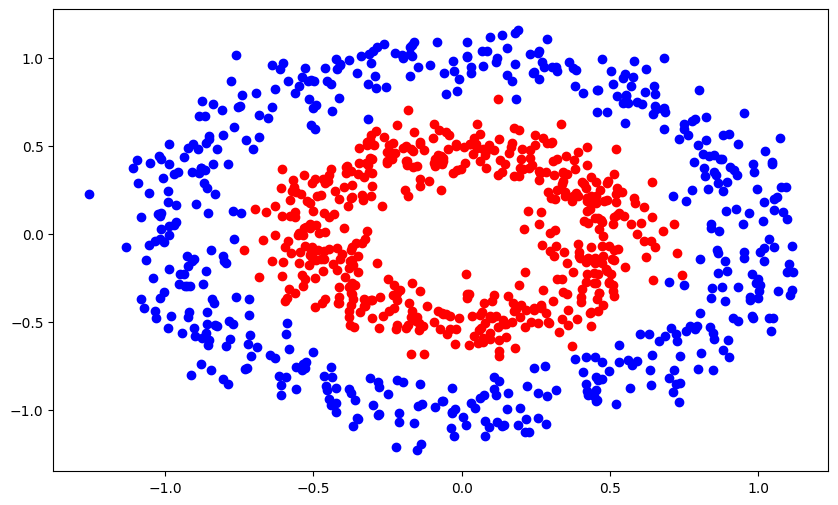

In [20]:
# Plot X and y as 2D scatter plot
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='blue')
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='red')
plt.show()

We can clearly see this is not a linearly separable dataset, as the two classes are intertwined in a circular pattern. This will be a good test for our KAN model.

Let's now create the model. It will have two input nodes, and two output nodes, one for each class. The key difference from an MLP is that the weights are replaced by learnable activation functions on the edges connecting the nodes.

In [21]:
import kan as kan

model = kan.KAN(width=[2,2], grid=3, k=3)

One great thing about the KAN `pytorch` implementation is that it alows us to easily visualize the model structure. Let's have a look at it.

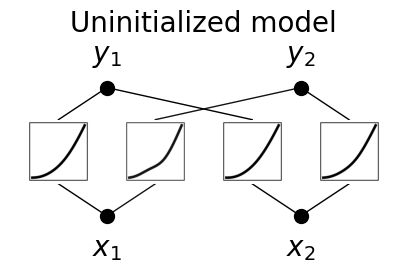

In [22]:
# Plot the uninitialized model

model(X)
model.plot(beta=100,
           in_vars=[r'$x_1$', r'$x_2$'],
           out_vars=[r'$y_1$', r'$y_2$'],
           title='Uninitialized model')

Now let us define two metric functions to evaluate the model performance - one for training accuracy, and one for test accuracy. We will then train the model on the training data and evaluate its performance.

In [23]:
def train_acc():
    return torch.mean(
        (torch.argmax(model(dataset['train_input']), dim=1) == dataset['train_label']).float())

def test_acc():
    return torch.mean(
        (torch.argmax(model(dataset['test_input']), dim=1) == dataset['test_label']).float())

results = model.train(dataset,
                      opt="LBFGS",
                      steps=50,
                      metrics=(train_acc, test_acc),
                      loss_fn=torch.nn.CrossEntropyLoss())
results['train_acc'][-1], results['test_acc'][-1]

train loss: 7.25e-02 | test loss: 2.76e-01 | reg: 6.95e+01 : 100%|██| 50/50 [00:03<00:00, 12.93it/s]


(0.9980000257492065, 0.9890000224113464)

That training run took just a few seconds to complete, and the model achieved a test accuracy of 0.98, which is quite impressive given the complexity of the dataset! This demonstrates the power of KANs in handling non-linearly separable data and achieving high accuracy with a simple model.

Let's look at the training performance of the model.

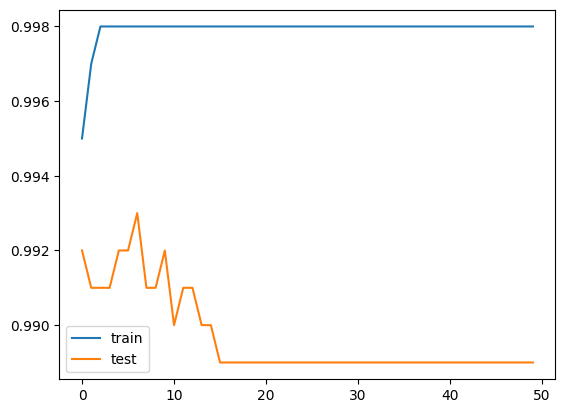

In [24]:
# Plot the training and test accuracy
import matplotlib.pyplot as plt

plt.plot(results['train_acc'], label='train')
plt.plot(results['test_acc'], label='test')
plt.legend()
plt.show()

 We can see that the training accuracy increases rapidly and converges to a high value, indicating that the model is learning effectively from the data just after a few training steps.

 Let's look at the model after training.

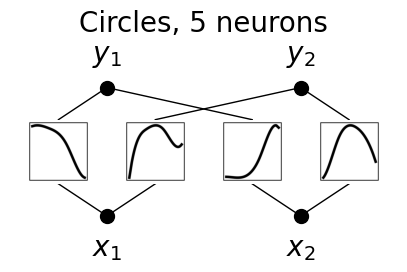

In [25]:
model.plot(title="Circles, 5 neurons",
           in_vars=[r'$x_1$', r'$x_2$'],
           out_vars=[r'$y_1$', r'$y_2$'],
           beta=20)

You will have noticed that the shape of the activation functions has changed after training. This is because the model has learned the optimal activation functions to map the input data to the output classes effectively.

Remember that we mentioned that KANs are more interpretable than MLPs? Let's look at the symbolic representation of the activation functions learned by the model. This is a unique feature of KANs that allows us to understand how the model is making decisions, and which you can't get from a traditional MLP network.

In [26]:
function_library = ['x','x^2','x^3','x^4','exp','log','sqrt','tanh','sin','tan','abs']
model.auto_symbolic(lib=function_library)
formula1, formula2 = model.symbolic_formula()[0]

fixing (0,0,0) with tanh, r2=0.9993071434156368
fixing (0,0,1) with sin, r2=0.9401037369164844
fixing (0,1,0) with tanh, r2=0.999352714644539
fixing (0,1,1) with sin, r2=0.9917005302866054


In [27]:
formula1

-43.6*tanh(1.44*x_1 - 0.94) + 36.18*tanh(2.0*x_2 - 1.08) + 53.17

In [28]:
formula2

-130.68*sin(1.71*x_1 + 4.8) - 506.75*sin(0.6*x_2 - 7.96) - 502.92

We get two formulas, one for each class, that represent the activation functions learned by the model. With this, we can now calculate the accuracy of the determined symbolic functions on the test data.

In [29]:
# Calculate the accuracy of the formula
import numpy as np

def symbolic_acc(formula1, formula2, X, y):
    batch = X.shape[0]
    correct = 0
    for i in range(batch):
        logit1 = np.array(formula1.subs('x_1', X[i,0]).subs('x_2', X[i,1])).astype(np.float64)
        logit2 = np.array(formula2.subs('x_1', X[i,0]).subs('x_2', X[i,1])).astype(np.float64)
        correct += (logit2 > logit1) == y[i]
    return correct/batch

print('formula train accuracy:', symbolic_acc(formula1, formula2, dataset['train_input'], dataset['train_label']))
print('formula test accuracy:', symbolic_acc(formula1, formula2, dataset['test_input'], dataset['test_label']))

formula train accuracy: tensor(0.9880)
formula test accuracy: tensor(0.9860)


That's quite impressive! The symbolic functions learned by the model achieve a test accuracy of 0.98, which is very close to the model itself. This demonstrates the power of KANs in learning interpretable activation functions that can effectively map input data to output classes.

As a last step, let's visualize the decision boundary learned by the model. This will help us understand how the model is separating the two classes in the input space.

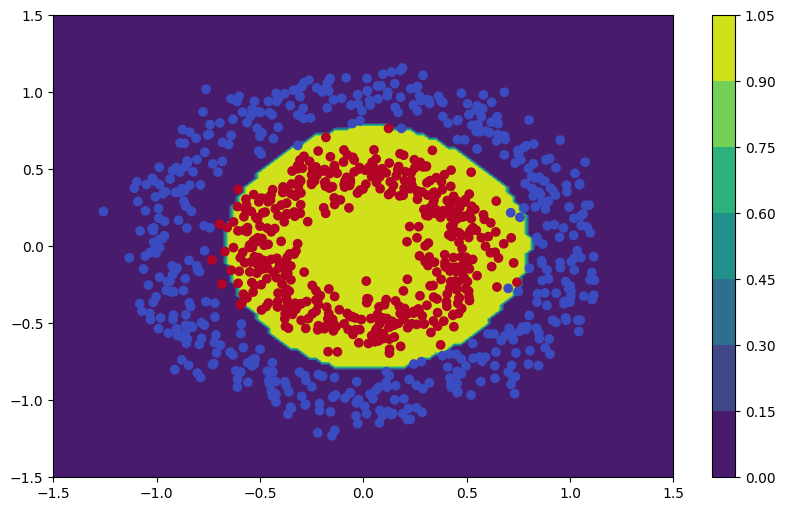

In [30]:
# Plot the symbolic formula as a Plotly contour plot
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-1.5, 1.5, 100)
y = np.linspace(-1.5, 1.5, 100)
X, Y = np.meshgrid(x, y)
Z = np.zeros_like(X)
for i in range(100):
    for j in range(100):
        logit1 = np.array(formula1.subs('x_1', X[i,j]).subs('x_2', Y[i,j])).astype(np.float64)
        logit2 = np.array(formula2.subs('x_1', X[i,j]).subs('x_2', Y[i,j])).astype(np.float64)
        # Determine the class by comparing the logits
        Z[i,j] = logit2 > logit1

plt.figure(figsize=(10, 6))
plt.contourf(X, Y, Z)
plt.colorbar()
plt.scatter(Circles_points_train[:,0], Circles_points_train[:,1], c=Circles_label_train, cmap='coolwarm')
plt.show()

That's impressive! The model has learned a complex decision boundary that effectively separates the two classes in the input space. It's clear that the model has captured the underlying patterns in the data and can make accurate predictions based on them.

```{image} https://steamuserimages-a.akamaihd.net/ugc/941715783846958607/5E440B2385C1959F74AF5E719BE2E589D97ACF72/?imw=5000&imh=5000&ima=fit&impolicy=Letterbox&imcolor=%23000000&letterbox=false
```

## Final remarks

KANs represent a significant advancement in the field of machine learning, offering a more efficient, interpretable, and powerful alternative to traditional MLPs. Their ability to learn activation functions on edges, rather than fixed weights on nodes, enables them to handle complex, high-dimensional data and achieve high accuracy with fewer parameters.

The theoretical foundation of KANs, inspired by the Kolmogorov-Arnold representation theorem, provides a solid basis for their design and performance. Their practical applications span a wide range of tasks, from data fitting to PDE solving, and their interpretability makes them valuable in scientific and regulated industries.

While challenges remain in scaling KANs and integrating them with existing frameworks, their potential for future research and development is vast.